# TD10: Expressions régulières et parsing - Correction

## Rappel de cours: 

Chercher un mot dans un texte est une tâche facile, c’est l’objectif de la méthode `find()` attachée aux chaînes de caractères. Elle suffit également lorsque l’on cherche un mot au pluriel ou au singulier, mais il faut dans ce cas l’appeler au moins deux fois.

Pour des expressions plus compliquées, il est conseillé d’utiliser les expressions régulières, ou “regex”. C’est une fonctionnalité qu’on retrouve dans beaucoup de langages. C’est une forme de grammaire qui permet de rechercher des expressions.

Par exemple, lorsqu’on remplit un formulaire, on voit souvent le format `"MM/JJ/AAAA"` qui précise sous quelle forme on s’attend à ce qu’une date soit écrite. Les expressions régulières permettent de définir également ce format et de chercher dans un texte toutes les chaînes de caractères qui sont conformes à ce format.

La liste qui suit contient des dates de naissance. On cherche à obtenir toutes les dates de cet exemple sachant que les jours ou les mois contiennent un ou deux chiffres, et les années deux ou quatre.

In [1]:
s = """date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976"""
print(s)

date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976


#### Exemple introductif : Format de date

Le premier chiffre du `jour` est soit 0, 1, 2, ou 3 ; ceci se traduit par `[0-3]`.

Le second chiffre est compris entre 0 et 9, soit `[0-9]`. Le format des jours est traduit par `[0-3][0-9]`. Mais le premier chiffre du jour est facultatif, ce qu’on précise avec le symbole ? : `[0-3]?[0-9]`.

Les `mois` suivent le même principe : `[0-1]?[0-9]`.

Pour les `années`, ce sont les deux premiers chiffres qui sont facultatifs, le symbole ? s’appliquent alors sur les deux premiers chiffres : `[0-2]?[0-9]?[0-9][0-9]`. Le format final d’une date devient alors :

`[0-3]?[0-9]/[0-1]?[0-9]/[0-2]?[0-9]?[0-9][0-9]`

Le module `re` gère les expressions régulières, celui-ci traite différemment les parties de l’expression régulière qui sont entre parenthèses de celles qui ne le sont pas : c’est un moyen de dire au module `re` que nous nous intéressons à telle partie de l’expression qui est signalée entre parenthèses. Comme la partie qui nous intéresse - une date - concerne l’intégralité de l’expression régulière, il faut insérer celle-ci intégralement entre parenthèses.

La première étape consiste à construire l’expression régulière, la seconde à rechercher toutes les fois qu’un morceau de la chaîne `s` définie plus haut correspond à l’expression régulière.

In [2]:
import re
# première étape : construction
expression = re.compile("([0-3]?\d/[0-1]?\d/[0-2]?\d?\d\d)")
# seconde étape : recherche
res = expression.findall(s)
print(res)

['14/9/2000', '20/04/1971', '14/09/1913', '2/3/1978', '1/7/1986', '7/3/47', '15/10/1914', '08/03/1941', '8/1/1980', '30/6/1976']


Le résultat est une liste dont chaque élément correspond aux parties comprises entre parenthèses qu’on appelle des groupes.

Lorsque les expressions régulières sont utilisées, on doit d’abord se demander comment définir ce qu’on cherche puis quelles fonctions utiliser pour obtenir les résultats de cette recherche. Les deux paragraphes qui suivent y répondent.

## Syntaxe

La syntaxe des expressions régulières est décrite sur le site officiel de python. La page [Regular Expression Syntax](https://docs.python.org/3/library/re.html) décrit comment se servir des expressions régulières, les deux pages sont en anglais. Comme toute grammaire, celle des expressions régulières est susceptible d’évoluer au fur et à mesure des versions du langage python.

## Les ensembles de caractères

Lors d’une recherche, on s’intéresse aux caractères et souvent aux classes de caractères : on cherche un chiffre, une lettre, un caractère dans un ensemble précis ou un caractère qui n’appartient pas à un ensemble précis. Certains ensembles sont prédéfinis, d’autres doivent être définis à l’aide de crochets.

Pour définir un ensemble de caractères, il faut écrire cet ensemble entre crochets. Par exemple, `[0123456789]` désigne un chiffre. Comme c’est une séquence de caractères consécutifs, on peut résumer cette écriture en `[0-9]`. Pour inclure les symboles `+` et `-`, il suffit d’écrire : `[-0-9+]`. La subtilité est qu’il faut penser à mettre le symbole `-` au début pour éviter qu’il ne désigne une séquence.

Le caractère `^` inséré au début du groupe signifie que le caractère cherché ne doit pas être un de ceux qui suivent. Le tableau suivant décrit les ensembles prédéfinis et leur équivalent en terme d’ensemble de caractères :

-   `.` désigne tout caractère non spécial quel qu’il soit.
-   `\d` désigne tout chiffre, est équivalent à `[0-9]`.
-   `\D` désigne tout caractère différent d’un chiffre, est équivalent à `[^0-9]`.
-   `\s` désigne tout espace ou caractère approché, est équivalent à `[\; \t\n\r\f\v]`. Ces caractères sont spéciaux, les plus utilisés sont `\t` qui est une tabulation, `\n` qui est une fin de ligne et qui `\r` qui est un retour à la ligne.
-   `\S` désigne tout caractère différent d’un espace, est équivalent à `[^ \t\n\r\f\v]`.
-   `\w` désigne toute lettre ou tout chiffre, est équivalent à `[a-zA-Z0-9_]`.
-   `\W` désigne tout caractère différent d’une lettre ou d’un chiffre, est équivalent à `[^a-zA-Z0-9_]`.
-   `^` désigne le début d’un mot sauf s’il est placé entre crochets.
-   `$` désigne la fin d’un mot sauf s’il est placé entre crochets.

A l’instar des chaînes de caractères, comme le caractère `\` est un caractère spécial, il faut le doubler : `[\\]`.

## Les multiplicateurs

Les multiplicateurs permettent de définir des expressions régulières comme : un mot entre six et huit lettres qu’on écrira `[\w]{6,8}`. Le tableau suivant donne la liste des multiplicateurs principaux :

-   `*` présence de l’ensemble de caractères qui précède entre 0 fois et l’infini
-   `+` présence de l’ensemble de caractères qui précède entre 1 fois et l’infini
-   `?` présence de l’ensemble de caractères qui précède entre 0 et 1 fois
-   `{m,n}` présence de l’ensemble de caractères qui précède entre *m* et *n* fois, si *m=n*, cette expression peut être résumée par `{n}`.
-   `(?!(...))` absence du groupe désigné par les points de suspensions.

L’algorithme des expressions régulières essaye toujours de faire correspondre le plus grand morceau à l’expression régulière.

Par exemple, pour la chaîne de charactère `<h1>mot</h1>`, l’expression régulière `<.*>` correspond à trois morceaux :
\* `<h1>`
\* `</h1>`
\* `<h1>mot</h1>` =\> le plus grand qui sera choisi.

Pour choisir les plus petits, il faudra écrire les multiplicateurs comme ceci : `*?`, `+?`

In [3]:
import re
s = "<h1>mot</h1>"
print(re.compile("<.*>").findall(s))
print(re.compile("<.*?>").findall(s))
print(re.compile("(<.*>)").match(s).groups())

['<h1>mot</h1>']
['<h1>', '</h1>']
('<h1>mot</h1>',)


In [4]:
print(re.compile("(.*</h1>)").match(s))
#équivaut à:
re.match(".*</h1>", s)


<re.Match object; span=(0, 12), match='<h1>mot</h1>'>


<re.Match object; span=(0, 12), match='<h1>mot</h1>'>

In [5]:
#ou encore à:
regex = re.compile("(.*</h1>)")
result = regex.match(s)
result

<re.Match object; span=(0, 12), match='<h1>mot</h1>'>

In [6]:
print(re.compile(".*(<.h1>)").match(s).groups()) 
print(re.compile("(<.?h1>)").findall(s))
#équivaut à:
print(re.match(".*(<.h1>)", s).groups())
#print(re.match("(<.?h1>)", s).findall(s))    > ne fonctionne pas car .findall(s) ne peut être associé a match, uniquement à .compile

('</h1>',)
['<h1>', '</h1>']
('</h1>',)


Un exemple pour trouver des adresses emails :

In [7]:
text_emails = 'Hello from shubhamg199630@gmail.com to priya@yahoo.com about the meeting @2PM'

In [8]:
# \S` désigne tout caractère différent d'un espace 
# `+` présence de l'ensemble de caractères qui précède entre 1 fois et l'infini
liste_emails = re.findall("\S+@\S+", text_emails)     

In [9]:
print(liste_emails)

['shubhamg199630@gmail.com', 'priya@yahoo.com']


## Exercices

<div class="alert alert-success" role="alert">

**Exercice 1: Application directe**

Recherchez les dates présentes dans la phrase suivante.

``` python
texte1 = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """
```

Puis dans celle-ci :

``` python
texte2 = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """
```
le résultat devrait être comme ci-dessous: 
    
    ['28/12/1903', '08/02/1957', '10/11/1963']
    ['28/12/1903', '08/02/1957', '8/5/45']

</div>

In [10]:
import re

texte1 = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """
texte2 = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

# completer le code... 
date = re.compile("([0-3]?\d/[0-1]?\d/[0-2]?\d?\d\d)")
re_date = date.findall(texte1)
re_date2 = date.findall(texte2)
print(re_date,"\n",re_date2)

['28/12/1903', '08/02/1957', '10/11/1963'] 
 ['28/12/1903', '08/02/1957', '8/5/45']


<div class="alert alert-success" role="alert">

**Exercice 2: Nettoyer une colonne de date de publication**

L’objectif général de l’exercice est de nettoyer des colonnes d’un DataFrame en utilisant des expressions régulières. 

La base en question contient des livres de la British Library et quelques informations les concernant.

La colonne “Date de Publication” n’est pas toujours une année, il y a parfois d’autres informations. Le but de l’exercice est d’avoir **une date de publication du livre propre** et de regarder la **distribution des années de publications**.

En regardant la base, on réalise que cette colonne ne correspond pas toujours à une année, par exemple en lignes 13 et 16.

``` python
data_books[['Date of Publication',"Title"]].iloc[13:20]
```

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date of Publication</th>
      <th>Title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>13</th>
      <td>1839, 38-54</td>
      <td>De Aardbol. Magazijn van hedendaagsche land- e...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1897</td>
      <td>Cronache Savonesi dal 1500 al 1570 ... Accresc...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>1865</td>
      <td>See-Saw; a novel ... Edited [or rather, writte...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>1860-63</td>
      <td>Géodésie d'une partie de la Haute Éthiopie,...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>1873</td>
      <td>[With eleven maps.]</td>
    </tr>
    <tr>
      <th>18</th>
      <td>1866</td>
      <td>[Historia geográfica, civil y politica de la ...</td>
    </tr>
    <tr>
      <th>19</th>
      <td>1899</td>
      <td>The Crisis of the Revolution, being the story ...</td>
    </tr>
  </tbody>
</table>
</div>

1. Commencez par regarder le nombre d’informations manquantes. On ne pourra pas avoir mieux après la regex, et normalement on ne devrait pas avoir moins…

2. Déterminer la forme de la regex pour une date de publication. A priori, il y a 4 chiffres qui forment une année.

3. Quelles lignes sont changées quand on applique notre regex à la colonne qui nous intéresse avec la fonction `str.extract()` ?

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date of Publication</th>
      <th>Date of Publication 2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1879 [1878]</td>
      <td>1879</td>
    </tr>
    <tr>
      <th>7</th>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1839, 38-54</td>
      <td>1839</td>
    </tr>
    <tr>
      <th>16</th>
      <td>1860-63</td>
      <td>1860</td>
    </tr>
    <tr>
      <th>23</th>
      <td>1847, 48 [1846-48]</td>
      <td>1847</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>8278</th>
      <td>1883, [1884]</td>
      <td>1883</td>
    </tr>
    <tr>
      <th>8279</th>
      <td>1898-1912</td>
      <td>1898</td>
    </tr>
    <tr>
      <th>8283</th>
      <td>1831, 32</td>
      <td>1831</td>
    </tr>
    <tr>
      <th>8284</th>
      <td>[1806]-22</td>
      <td>1806</td>
    </tr>
    <tr>
      <th>8286</th>
      <td>1834-43</td>
      <td>1834</td>
    </tr>
  </tbody>
</table>
<p>1759 rows × 2 columns</p>
</div>

4.  On a 2 `NaN` qui n’étaient pas présents au début de l’exercice. Quels sont-ils et pourquoi ?

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date of Publication</th>
      <th>Date of Publication 2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1081</th>
      <td>112. G. &amp; W. B. Whittaker</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7391</th>
      <td>17 vols. University Press</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

5.  Quelle est la répartition des dates de publications dans le jeu de données ? Vous pouvez par exemple afficher un histogramme.

    <AxesSubplot:ylabel='Frequency'>

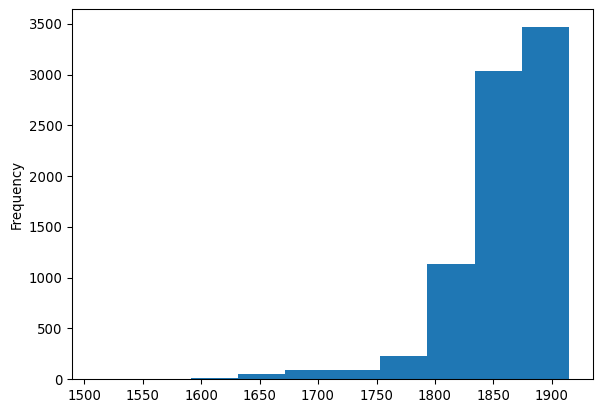

</div>

### Lecture et analyse préliminaire du fichier `BL-Flickr-Images-Book.csv`

Enoncé :

data_books[['Date of Publication',"Title"]].iloc[13:20]

In [34]:
#Import:
import pandas as pd
import re
import numpy as np
import matplotlib as plt

#Désignation du dataframe grâce à pandas
data_f = pd.read_csv("ImagesBook.csv")

In [42]:
#Première Question:
print(data_f.shape[0])
#correspond au nombre de lignes

print(data_f.shape[0]-int(data_f[["Date of Publication"]].count()))
#correspond au lignes contenant un NAN dans la colonne "Date of Publication"
#avec => total-toutes dates autres que NAN = nombre de NAN

8287
181


In [43]:
#Deuxième Question:
forme_reg = "([0-2]\d\d\d)"
#correspond aux quatres chiffres possibles pour une date

In [46]:
#Troisième Question:
data_f["Date of Publication 2"] = data_f["Date of Publication"].str.extract(forme_reg)
data_f["Date of Publication 2"].isin(data_f["Date of Publication"]).value_counts()
#Vérifie si les données sont identiques entre Date of Publication2 et Date of Publication, si non les marque False


True     8278
False       9
Name: Date of Publication 2, dtype: int64

In [47]:
#Quatrième Question:
#En appliquant la regex sur le dataframe, on va obtenir deux NAN supplémentaires
data_f[["Date of Publication 2", "Date of Publication"]][data_f["Date of Publication 2"].isna()].shape[0]

183

array([[<AxesSubplot: title={'center': 'Date of Publication 2'}>]],
      dtype=object)

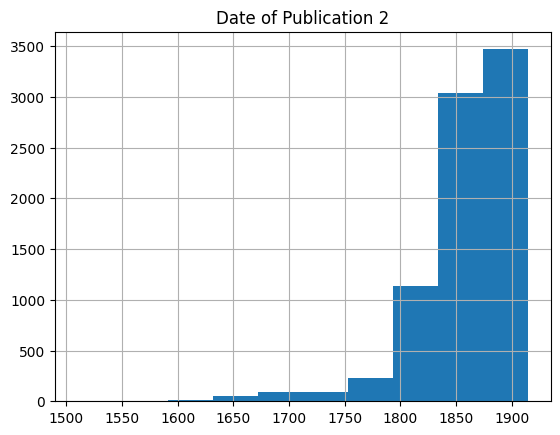

In [56]:
#Cinquème Question:
data_f["Date of Publication 2"] = pd.to_numeric(data_f["Date of Publication 2"])

data_f.hist(column="Date of Publication 2")


En regardant la base, on réalise que colonne **Date of Publication** ne correspond pas toujours à une année, par exemple en lignes **0, 13, 16, 23, 24, 25, etc.**

<div class="alert alert-success" role="alert">

**Exercice 3: Filtrage, extraction, et remplacement des valeurs**
    
Dans cette exercice, nous aborderons six tâches d'expressions régulières pour effectuer les actions suivantes: 
* Filtrer les données pour renvoyer les lignes qui correspondent à certains critères.
* Extraire des sous-chaînes et d'autres détails d'une colonne.
* Remplacer les valeurs dans une colonne.

Pour illustrer cela, nous allons utiliser le jeu de données titanic de Kaggle disponible. Sur un nouveau notebook Jupyter, importez des pandas et chargez les données. Puis, répondez aux quesiton suivantes: 
    
1. Filtrer le Dataframe pour renvoyer les lignes où les numéros de `ticket` contenaient `C` et `A`.
2. Extraire tous les titres tels que `Mr`, `Miss`, et `Mrs` des noms de passagers.
3. Extraire à partir de la colonne **Name**, les `Titles`, `first names`, et `last names` et renvoyez-les sous forme de colonnes dans un nouveau dataframe.
4. Présentez le dataframe ci-dessus avec des colonnes nommées et ordonnées.
5. Remplacez tous les `titles` par des majuscules.
6. Ne mettez en majuscule que les titres de  `Mr.` et `Mrs.` Dans ce cas, nous utilisons ```|``` entre parenthèses.

</div>

### Lecture et analyse préliminaire du fichier `titanic.csv`

In [49]:
#Import:
import pandas as pd

#Désignation du dataframe grâce à pandas
data_f2 = pd.read_csv("titanic.csv")
data_f2.shape[0]
data_f2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Question 1

In [54]:
#Permière Question:
re_ticket = "([.*C+][.*A+])" #regular expression utilisée pour reconnaitre les tickets contenant A et C
lig = data_f2[data_f2["Ticket"].str.contains(re_ticket)] #regex appliquée sur la colonne ticket
lig


/tmp/ipykernel_8048/2609649800.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lig = data_f2[data_f2["Ticket"].str.contains(re_ticket)] #regex appliquée sur la colonne ticket


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.50,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.50,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.50,NaN,S


### Question 2

In [18]:
#On défini chaque regular expression:
re_Mr = "(?:Mr)"
re_Miss = "(?:Miss)"
re_Mrs = "(?:Mrs)"

#On print le nombre de fois qu'elles apparaissent dans la colonne Name du dataframe n°2
print(data_f2[data_f2["Name"].str.contains(re_Mr)].shape[0])
print(data_f2[data_f2["Name"].str.contains(re_Miss)].shape[0])
print(data_f2[data_f2["Name"].str.contains(re_Mrs)].shape[0])

647
182
129


### Question 3

In [19]:
#Avec str.extract on récupère les Last name, Title et First name des passagers dans le dataframe°2 qu'on va placer dans un 3ème dataframe en colonne:
data_f3 = data_f2["Name"].str.extract(r'(?P<Last_name>.*)\,\s(?P<Title>.*)\.\s(?P<First_name>.*)', expand=True)
print(data_f3)

     Last_name Title                             First_name
0       Braund    Mr                            Owen Harris
1      Cumings   Mrs  John Bradley (Florence Briggs Thayer)
2    Heikkinen  Miss                                  Laina
3     Futrelle   Mrs          Jacques Heath (Lily May Peel)
4        Allen    Mr                          William Henry
..         ...   ...                                    ...
886   Montvila   Rev                                 Juozas
887     Graham  Miss                         Margaret Edith
888   Johnston  Miss               Catherine Helen "Carrie"
889       Behr    Mr                            Karl Howell
890     Dooley    Mr                                Patrick

[891 rows x 3 columns]


### Question 4

In [20]:
#On va remttre dans un bon ordre les éléments Title, Last name et First name pour chaque passager:
data_f3 = data_f3[["Title","Last_name","First_name"]]
data_f3

,Title,Last_name,First_name
0,Mr,Braund,Owen Harris
1,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,Miss,Heikkinen,Laina
3,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,Mr,Allen,William Henry
...,...,...,...
886,Rev,Montvila,Juozas
887,Miss,Graham,Margaret Edith
888,Miss,Johnston,"Catherine Helen ""Carrie"""
889,Mr,Behr,Karl Howell


### Question 5

In [21]:
#Ici, on va simplement mettre en majuscule l'entiereté des titres en utilisant str.upper() : 
data_f3_UPPER = data_f3.copy()
data_f3_UPPER["Title"] = data_f3_UPPER["Title"].str.upper()
data_f3_UPPER

,Title,Last_name,First_name
0,MR,Braund,Owen Harris
1,MRS,Cumings,John Bradley (Florence Briggs Thayer)
2,MISS,Heikkinen,Laina
3,MRS,Futrelle,Jacques Heath (Lily May Peel)
4,MR,Allen,William Henry
...,...,...,...
886,REV,Montvila,Juozas
887,MISS,Graham,Margaret Edith
888,MISS,Johnston,"Catherine Helen ""Carrie"""
889,MR,Behr,Karl Howell


### Question 6

In [ ]:
#Cette fois-ci, uniquement les Mr et Mrs doivent être en majuscules:
data_f3_2U = data_f3_UPPER.copy()
regexU = "(Mr|Mrs)"
data_f3_2U["Title2"] = data_f3_2U["Title"].str.upper()(data_f3_2U["Title"].find(regexU))
data_f3_2U

In [ ]:
#Autre méthode:
data_f3_2U = data_f3_UPPER.copy()

#Usage d'une boucle pour vérifier chaque ligne présence de MISS:
for i in data_f3_2U["Title"].shape[0]:
    if data_f3_2U["Title"][i] == "MISS":
        data_f3_UPPER["Title"][i] = data_f3_UPPER["Title"][i].str.casefold()

data_f3_UPPER

In [ ]:
#On peut aussi utiliser un Try/Except: